In [41]:
#Reduce Number of unique colors using k-means clustering

In [42]:
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
import matplotlib.pyplot as plt


In [43]:
#opens the image using PIL->Ensures RGB->Displays Image
image = Image.open('land.jpg')
image = image.convert('RGB')  # Ensure RGB format

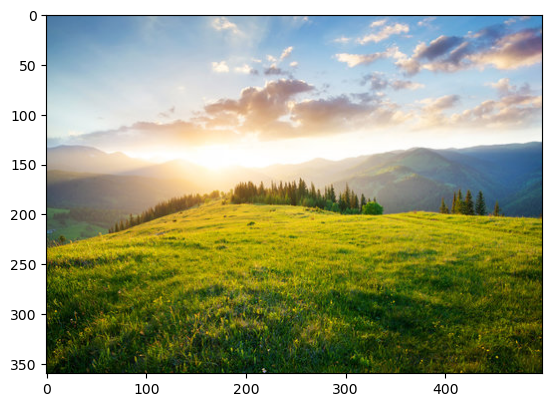

In [44]:
image_np = np.array(image)
image_np.shape
plt.imshow(image_np)


In [45]:
#reshaping all pixels into single column for better computation
pixels = image_np.reshape(-1,3)
pixels.shape


(179280, 3)

In [46]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixels)

KMeans(n_clusters=5, random_state=42)

In [47]:
compressed_colors = kmeans.cluster_centers_
labels = kmeans.labels_

In [48]:
#Represents the RGB Pixel value of 'k' number of centroids
compressed_colors

array([[230.73417301, 225.89316635, 216.43421334],
       [ 52.06250363,  68.87131035,  14.42143923],
       [167.92036165, 180.12868656, 190.57142032],
       [163.49624573, 151.50214086,  18.74650946],
       [100.76107095, 119.49097724, 133.7362249 ]])

In [49]:
#represents the index of the centroid each pixel belongs to
labels


array([4, 4, 4, ..., 1, 1, 1], dtype=int32)

In [50]:
#reconstructing the image
compressed_pixels = compressed_colors[labels]
compressed_pixels = np.clip(compressed_pixels, 0, 255).astype('uint8')


In [51]:
compressed_pixels.shape

(179280, 3)

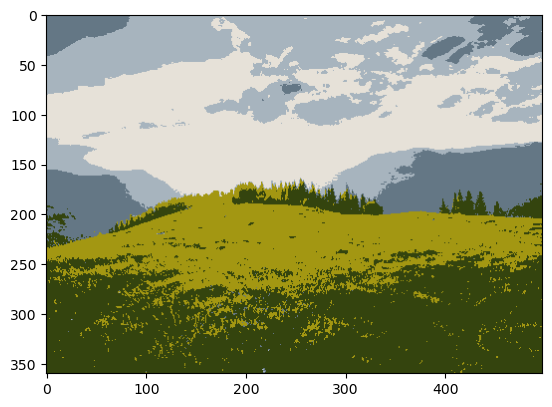

In [52]:
compressed_image_np = compressed_pixels.reshape(image_np.shape)
compressed_image_np.shape
plt.imshow(compressed_image_np)